# **Loading the Libraries and Data**


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import openpyxl


#**Global Functions and Values**

In [39]:
def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['F1'] = f1_score(y_true, y_pred, average='weighted')
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    
    return metrics

In [40]:
#list to metrics of all tables
metrics_table = list()

# **Load Dataset**

## Load dataset from Github Repository

In [41]:
df = pd.read_excel('https://raw.githubusercontent.com/divaamahajan/DataMining/main/output%20(1).xlsx')
df = df[df['label'] == 1]

## Displaying the contents of the file


**Primary object types:**
- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column


**Get dataframe**: 
Read CSV file from the 'data' subdirectory using a relative path.
*  `head() `will print the first 5 rows of the dataframe
*  `tail()` will print the last 5 rows) of the dataframe




In [42]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,418.059877,1334.299202,185208.634594,685.261993,1336.575579,184795.820881,1996.425331,1338.932184,183873.653240,19628.468198,...,0.000000e+00,27982.186943,1341.449612,424.940741,1341.449612,180574.632951,0.000000e+00,0.000000e+00,1,1
1,488.523264,1367.935645,163675.161045,744.250467,1356.730687,173225.088504,2039.995718,1343.087849,182685.673960,19717.387605,...,0.000000e+00,27789.981767,1341.486742,424.994747,1341.486742,180620.534802,0.000000e+00,0.000000e+00,1,1
2,40.533224,60.916988,160.392211,59.058880,61.344972,231.378922,154.739667,61.771273,294.528500,1448.510921,...,-4.331544e-09,14000.577706,60.000000,0.000001,1228.891956,56864.571093,-2.389470e-12,-7.429602e-09,1,1
3,397.430309,1332.924461,188635.619853,540.980430,1333.931334,187810.021874,776.491325,1333.700924,187839.338942,2704.834592,...,0.000000e+00,27885.564576,1341.329511,425.037134,1341.329511,180656.565605,0.000000e+00,0.000000e+00,1,1
4,349.695349,1362.920192,155477.113736,605.926059,1357.035476,162094.609866,1915.179777,1348.771096,171432.555708,19546.681370,...,0.000000e+00,27989.578875,1341.217689,425.176631,1341.217689,180775.167706,0.000000e+00,0.000000e+00,1,1


# **Data Preprocessing**


**Importance of Data Preprocessing stage**
1. Different ML models have different required input data (numerical data, images in specific format, etc). Without the right data, nothing will work.
2. Because of “bad” data, ML models will not give any useful results, or even may give wrong answers, that may lead to wrong decisions (GIGO principle).
3. The higher the quality of the data, the less data is needed.

## Drop unwanted Columns

**Drop Duplicate Columns**

In [43]:
df = df.drop_duplicates()

In [44]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,418.059877,1334.299202,185208.634594,685.261993,1336.575579,184795.820881,1996.425331,1338.932184,183873.653240,19628.468198,...,0.000000e+00,27982.186943,1341.449612,424.940741,1341.449612,180574.632951,0.000000e+00,0.000000e+00,1,1
1,488.523264,1367.935645,163675.161045,744.250467,1356.730687,173225.088504,2039.995718,1343.087849,182685.673960,19717.387605,...,0.000000e+00,27789.981767,1341.486742,424.994747,1341.486742,180620.534802,0.000000e+00,0.000000e+00,1,1
2,40.533224,60.916988,160.392211,59.058880,61.344972,231.378922,154.739667,61.771273,294.528500,1448.510921,...,-4.331544e-09,14000.577706,60.000000,0.000001,1228.891956,56864.571093,-2.389470e-12,-7.429602e-09,1,1
3,397.430309,1332.924461,188635.619853,540.980430,1333.931334,187810.021874,776.491325,1333.700924,187839.338942,2704.834592,...,0.000000e+00,27885.564576,1341.329511,425.037134,1341.329511,180656.565605,0.000000e+00,0.000000e+00,1,1
4,349.695349,1362.920192,155477.113736,605.926059,1357.035476,162094.609866,1915.179777,1348.771096,171432.555708,19546.681370,...,0.000000e+00,27989.578875,1341.217689,425.176631,1341.217689,180775.167706,0.000000e+00,0.000000e+00,1,1


**Reset Column Names**

In [45]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.0
mean,1030.426758,986.039229,125462.533921,1697.095602,987.189653,125320.611051,4922.232608,989.706059,125832.582146,37744.068363,...,-0.004895,17887.717168,991.880065,262.422193,1018.284388,1.039445e+05,-57.957878,-0.009929,5.000000,1.0
std,2235.163119,548.569059,107858.159377,3708.335200,547.966799,107263.543913,10903.564535,546.054549,106363.044040,87747.065608,...,0.055082,12228.098928,566.806823,184.617471,549.878563,8.193004e+04,936.697286,0.066442,2.582132,0.0
min,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,52.000000,0.000000,1.000000,...,-1.125295,1.000000,52.000000,0.000000,52.000000,0.000000e+00,-42930.372063,-1.132545,1.000000,1.0
25%,85.389727,136.000000,302.681705,144.723159,136.000000,761.390018,410.268723,136.000000,3027.642827,3630.552197,...,0.000000,332.042887,136.000000,0.000006,162.514764,8.265488e-09,0.000000,0.000000,3.000000,1.0
50%,170.367646,1320.831860,154420.747889,280.964771,1326.119413,155714.954477,847.620232,1333.185384,165968.302734,8435.352612,...,0.000000,26590.706354,1340.506557,420.776722,1340.574915,1.770530e+05,0.000000,0.000000,5.000000,1.0
75%,400.121057,1351.127398,188576.032992,660.938654,1347.467512,186547.321999,1963.345872,1343.031849,184695.420738,18074.740978,...,0.000000,28036.192743,1341.402298,425.627066,1341.520562,1.811584e+05,0.000000,0.000000,7.000000,1.0
max,7453.993874,1509.942684,460635.468723,12411.130803,1487.520259,468634.269165,37172.305125,1421.788946,472547.455004,354072.979944,...,0.965222,30884.169297,1450.000000,613.753398,1450.000000,3.767537e+05,23736.756272,0.968302,9.000000,1.0


## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`

In [46]:
#check null values
df1 = df[df.isna().any(axis=1)]
print (df1)

Empty DataFrame
Columns: [feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, feature_13, feature_14, feature_15, feature_16, feature_17, feature_18, feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_27, feature_28, feature_29, feature_30, feature_31, feature_32, feature_33, feature_34, feature_35, feature_36, feature_37, feature_38, feature_39, feature_40, feature_41, feature_42, feature_43, feature_44, feature_45, feature_46, feature_47, feature_48, feature_49, feature_50, feature_51, feature_52, feature_53, feature_54, feature_55, feature_56, feature_57, feature_58, feature_59, feature_60, feature_61, feature_62, feature_63, feature_64, feature_65, feature_66, feature_67, feature_68, feature_69, feature_70, feature_71, feature_72, feature_73, feature_74, feature_75, feature_76, feature_77, feature_78, feature_79, feature_80, feature_81, feature_82,

**Observation** : No null Values Found

## **Data Transformation**

### **Standardization**

**min_max scaler** is a way to get data in the range 0 to 1

**StandardScaler** if you need -1 to 1 range. Scale each variable to have a mean of 0 and a standard deviation of 1

We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

In [47]:
#Importing required modules
from sklearn.preprocessing import MinMaxScaler

# use the MinMaxScaler scale all the columns except for the last two, attack and label
cols_to_scale = df.columns[:-2]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

#view first five rows of scaled DataFrame
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.055959,0.879526,0.402072,0.055137,0.894850,0.394328,0.053682,0.939511,0.389112,0.055434,...,0.538286,0.906034,0.922353,6.923640e-01,0.922353,0.479291,0.643951,0.53909,1,1
1,0.065413,0.902598,0.355325,0.059891,0.908890,0.369638,0.054854,0.942545,0.386598,0.055685,...,0.538286,0.899810,0.922380,6.924520e-01,0.922380,0.479413,0.643951,0.53909,1,1
2,0.005304,0.006116,0.000348,0.004678,0.006510,0.000494,0.004136,0.007133,0.000623,0.004088,...,0.538286,0.453308,0.005722,2.197461e-09,0.841840,0.150933,0.643951,0.53909,1,1
3,0.053191,0.878584,0.409512,0.043511,0.893008,0.400760,0.020863,0.935692,0.397504,0.007636,...,0.538286,0.902905,0.922267,6.925210e-01,0.922267,0.479508,0.643951,0.53909,1,1
4,0.046786,0.899158,0.337527,0.048745,0.909103,0.345887,0.051496,0.946694,0.362784,0.055203,...,0.538286,0.906273,0.922187,6.927483e-01,0.922187,0.479823,0.643951,0.53909,1,1


In [48]:
df.shape

(9000, 117)

## **Handling (drop) outliers**
    # Note: dropping is only one of techniques to handle with outliers


### Z-Score
* A **z-score** measures how many standard deviations a data point is from the mean in a distribution.
* A normal distribution is shown below and it is estimated that
>* outliers_threshold = 1: 68% of the data points lie between +/- 1 standard deviation.
>* outliers_threshold = 2: 95% of the data points lie between +/- 2 standard deviation
>* outliers_threshold = 3: 99.7% of the data points lie between +/- 3 standard deviation
>* outliers_threshold = 4: 99.9% of the data points lie between +/- 4 standard deviation
* We are removing all the rows above this outlier threshold

In [49]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df))
z_scores.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label
0,0.273985,0.634887,0.553963,0.272869,0.637640,0.554508,0.268350,0.639580,0.545719,0.206464,...,0.088873,0.825560,0.616769,0.880348,0.587736,0.935363,0.061878,0.149448,1.549193,NaN
1,0.242458,0.696207,0.354306,0.256961,0.674423,0.446630,0.264354,0.647191,0.534549,0.205451,...,0.088873,0.809841,0.616835,0.880640,0.587803,0.935924,0.061878,0.149448,1.549193,NaN
2,0.442898,1.686522,1.161795,0.441742,1.689694,1.166251,0.437266,1.699439,1.180344,0.413661,...,0.088873,0.317903,1.644179,1.421516,0.383029,0.574668,0.061878,0.149448,1.549193,NaN
3,0.283215,0.632381,0.585738,0.311779,0.632814,0.582611,0.380240,0.629999,0.583005,0.399343,...,0.088873,0.817658,0.616557,0.880870,0.587517,0.936364,0.061878,0.149448,1.549193,NaN
4,0.304573,0.687064,0.278294,0.294264,0.674980,0.342857,0.275802,0.657599,0.428744,0.207396,...,0.088873,0.826165,0.616360,0.881626,0.587314,0.937811,0.061878,0.149448,1.549193,NaN


In [50]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df.shape[0]} rows")

 No. of outlier rows = 9000 from total 9000 rows


**Observation:** :  No. of outlier rows = 2083 from total 18000 rows

Let us remove these outliers.

In [51]:
df_zscored = df[mask]
df_zscored.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,attack,label


We now have 15917 rows of clean data


# **Model Building**

In [52]:
# Split the dataset into training and testing sets
X = df.drop(['attack', 'label'], axis=1) # features
y = df['attack'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train - 1, num_classes=9)
y_test_encoded = to_categorical(y_test - 1, num_classes=9)

In [54]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.decomposition import PCA

# # Perform PCA on the training set to reduce the dimensionality
# pca = PCA(n_components=50)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.fit_transform(X_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new random forest
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Random Forest Classifier", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.8856944444444445


,Value
Model,Random Forest Classifier
Accuracy,0.892222
Precision,0.89222
Recall,0.892222
F1,0.892075
Kappa,0.878723
MCC,0.878782


In [56]:
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM object
svm = SVC()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new SVM
best_svm = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])

# Fit the model to the training data
best_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svm.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Support Vector Machine", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.8619444444444445


,Value
Model,Support Vector Machine
Accuracy,0.876667
Precision,0.871829
Recall,0.876667
F1,0.872415
Kappa,0.861209
MCC,0.86177


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.8, 1.0]
}

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new GradientBoostingClassifier
best_gb = GradientBoostingClassifier(learning_rate=grid_search.best_params_['learning_rate'], max_depth=grid_search.best_params_['max_depth'], n_estimators=grid_search.best_params_['n_estimators'], subsample=grid_search.best_params_['subsample'])

# Fit the model to the training data
best_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gb.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Gradient Boosting Classifier", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best score: 0.8872222222222221


,Value
Model,Gradient Boosting Classifier
Accuracy,0.893333
Precision,0.893662
Recall,0.893333
F1,0.893322
Kappa,0.879975
MCC,0.880046


In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to train a new KNeighborsClassifier
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], weights=grid_search.best_params_['weights'], p=grid_search.best_params_['p'])

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_knn.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="K Neighbor Classifier", y_true=y_test, y_pred = y_pred)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best score: 0.8631944444444445


,Value
Model,K Neighbor Classifier
Accuracy,0.863889
Precision,0.862199
Recall,0.863889
F1,0.862511
Kappa,0.846847
MCC,0.847039


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(115,), activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

optimizer = Adam(lr=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=200, batch_size=128)

y_pred = model.predict(X_test)

# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="Simple Neural Network", y_true=y_test_classes, y_pred = y_pred_classes)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


57/57 [==============================] - 1s 2ms/step - loss: 1.3661 - accuracy: 0.4300
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 0.9909 - accuracy: 0.5938
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 0.7939 - accuracy: 0.6918
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.7421
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7757
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.8021
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8150
Epoch 8/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8135
Epoch 9/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8296
Epoch 10/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8319
Epoch 11/200
57/57 [=

,Value
Model,Simple Neural Network
Accuracy,0.886667
Precision,0.928063
Recall,0.886667
F1,0.852739
Kappa,0.872368
MCC,0.880557


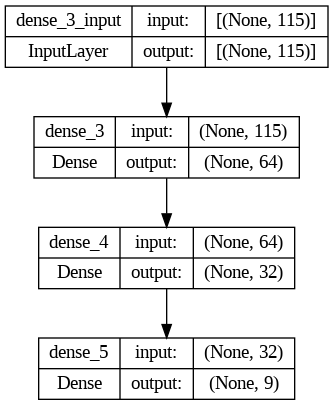

In [60]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [61]:
metric_df = pd.DataFrame(metrics_table)
metric_df.style.highlight_max(axis=0, subset=metric_df.columns[1:])

,Model,Accuracy,Precision,Recall,F1,Kappa,MCC
0,Random Forest Classifier,0.892222,0.892220,0.892222,0.892075,0.878723,0.878782
1,Support Vector Machine,0.876667,0.871829,0.876667,0.872415,0.861209,0.861770
2,Gradient Boosting Classifier,0.893333,0.893662,0.893333,0.893322,0.879975,0.880046
3,K Neighbor Classifier,0.863889,0.862199,0.863889,0.862511,0.846847,0.847039
4,Simple Neural Network,0.886667,0.928063,0.886667,0.852739,0.872368,0.880557


In [67]:
type(best_gb)

sklearn.ensemble._gb.GradientBoostingClassifier

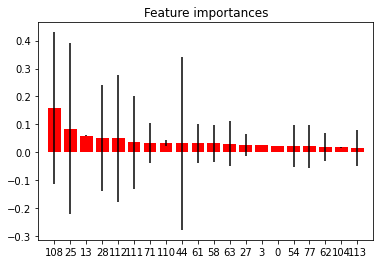

In [77]:
import matplotlib.pyplot as plt
import xgboost as xgb

n = 20
importances = best_gb.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_gb.estimators_[0]], axis=0)
indices = np.argsort(importances)[::-1][:n]  # Select only top n features

# Visualize feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(n), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()

The graph is showing the feature importances of the variables in our model. Each bar represents the importance of a specific variable, with the height of the bar indicating how much the variable contributes to the accuracy of the model.

The variables are sorted in descending order of importance, so the most important variables are on the left-hand side of the graph. We can see that some variables have very low importances, while others are quite important.

Applying PCA actually reduces the performance based on the experiments. 
While this can be helpful in reducing noise and redundancy in the data, it can also result in the loss of important information that may be necessary for accurate prediction.